In [1]:
import torch
from torch import nn
from pathlib import Path
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
plt.style.use('dark_background')

from modules import ELBO
from utils import load_sim_data

### Setup parameters

In [2]:
N = 11
out_dict = "/Users/nguyentiendung/GitHub/perceptual-straightening/model/"
data_path = "/Users/nguyentiendung/GitHub/perceptual-straightening/data/simulations/"

### Run inference

In [3]:
elbo = ELBO(N, data_path)

lr = 1e-4
optimizer = torch.optim.Adam(elbo.parameters(), lr=lr)
model_file = Path(out_dict) / 'model.pt'

#### Pre-train optimizer by only optimizing KL-divergence first (find a good initialization)

In [4]:
iterations = 10000
kl_loss = np.zeros(iterations)

for i in range(iterations):
    kl = elbo.kl_divergence()
    kl.backward()
    optimizer.step()
    optimizer.zero_grad()

    kl_loss[i] = kl.item()

    if not i % 1000:
        print(f"Epoch: {i}, Loss: {kl.item()}")

Epoch: 0, Loss: 5804.2021484375
Epoch: 1000, Loss: 4500.3583984375
Epoch: 2000, Loss: 3560.534423828125
Epoch: 3000, Loss: 2840.046142578125
Epoch: 4000, Loss: 2269.419921875
Epoch: 5000, Loss: 1809.8648681640625
Epoch: 6000, Loss: 1437.002685546875
Epoch: 7000, Loss: 1133.9447021484375
Epoch: 8000, Loss: 888.0504760742188
Epoch: 9000, Loss: 689.31494140625


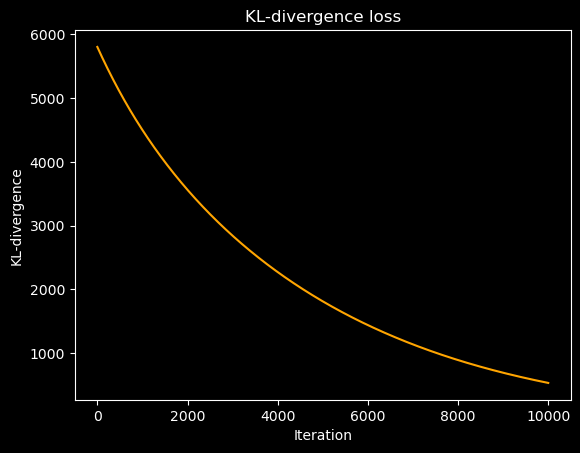

In [5]:
plt.plot(kl_loss, color='orange')
plt.title('KL-divergence loss')
plt.xlabel('Iteration')
plt.ylabel('KL-divergence')
plt.show()

#### Optimize the whole ELBO

In [6]:
iterations = 10000
errors = np.zeros(iterations)
kl_loss = np.zeros(iterations)
ll_loss = np.zeros(iterations)

for i in range(iterations):
    log_ll, d, c, a, l = elbo.compute_likelihood()
    kl = elbo.kl_divergence()
    loss = elbo.compute_loss(log_ll, kl)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    errors[i] = loss.item()
    kl_loss[i] = kl.item()
    ll_loss[i] = log_ll.item()

    if not i % 100:
        print(f"Epoch: {i}, Loss: {loss.item()}")

Epoch: 0, Loss: 1112.044921875
Epoch: 100, Loss: 1402.744873046875
Epoch: 200, Loss: 1024.3544921875
Epoch: 300, Loss: 1297.220947265625
Epoch: 400, Loss: 892.0360107421875
Epoch: 500, Loss: 942.519287109375
Epoch: 600, Loss: 751.4338989257812
Epoch: 700, Loss: 1153.628173828125
Epoch: 800, Loss: 704.888671875
Epoch: 900, Loss: 828.9667358398438
Epoch: 1000, Loss: 844.4202270507812
Epoch: 1100, Loss: 775.2033081054688
Epoch: 1200, Loss: 492.76220703125
Epoch: 1300, Loss: 792.9308471679688
Epoch: 1400, Loss: 631.5648803710938
Epoch: 1500, Loss: 593.4007568359375
Epoch: 1600, Loss: 396.635986328125
Epoch: 1700, Loss: 425.0853271484375
Epoch: 1800, Loss: 525.9656982421875
Epoch: 1900, Loss: 479.10467529296875
Epoch: 2000, Loss: 603.1279907226562
Epoch: 2100, Loss: 358.714111328125
Epoch: 2200, Loss: 524.2952270507812
Epoch: 2300, Loss: 324.43804931640625
Epoch: 2400, Loss: 266.57061767578125
Epoch: 2500, Loss: 360.0401611328125
Epoch: 2600, Loss: 301.17474365234375
Epoch: 2700, Loss: 226.

KeyboardInterrupt: 

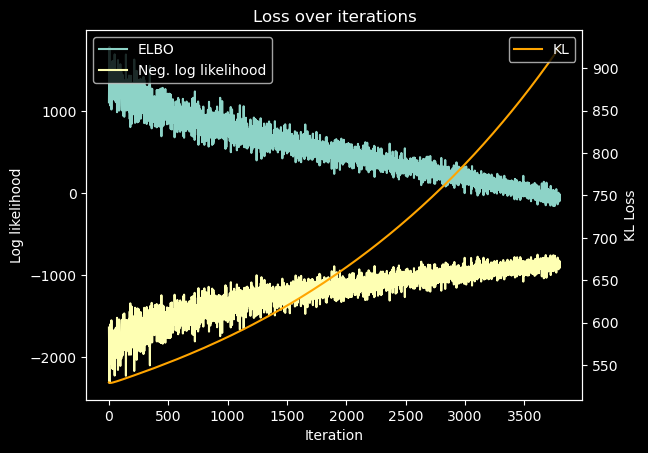

In [9]:
fig, ax1 = plt.subplots()

# Primary y-axis (ELBO and Neg. log likelihood)
ax1.plot(errors[:3800], label='ELBO')
ax1.plot(ll_loss[:3800], label='Neg. log likelihood')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Log likelihood')
ax1.tick_params(axis='y')

# Add title
plt.title('Loss over iterations')

# Create a secondary y-axis for KL loss
ax2 = ax1.twinx()
ax2.plot(kl_loss[:3800], label='KL', color='orange')
ax2.set_ylabel('KL Loss')
ax2.tick_params(axis='y')

# Add legends for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

In [ ]:
# # load simulated data
# discrim_mat = torch.from_numpy(scipy.io.loadmat(Path(data_path) / 'discriminality_matrix.mat')['Pc_reshaped'])

# # plot data
# ax = sns.heatmap(discrim_mat, cmap='Blues')
# ax.invert_yaxis()
# plt.show()

In [8]:
elbo.mu_c.detach().numpy() * (180 / np.pi)

array([68.77295], dtype=float32)